In [4]:
import pandas as pd

In [5]:
pr = pd.read_csv("ipl2024.csv")

In [6]:
pr.shape

(74, 15)

In [7]:
pr.head

<bound method NDFrame.head of     id        date      team1      team2 toss_winner decision  first_score  \
0    1  22-03-2024  Bangalore    Chennai   Bangalore      Bat          173   
1    2  23-03-2024      Delhi     Punjab      Punjab    Field          174   
2    3  23-03-2024    Kolkata  Hyderabad   Hyderabad    Field          208   
3    4  24-03-2024  Rajasthan    Lucknow   Rajasthan      Bat          193   
4    5  24-03-2024    Gujarat     Mumbai      Mumbai    Field          168   
..  ..         ...        ...        ...         ...      ...          ...   
69  70  19-05-2024  Rajasthan    Kolkata     Kolkata    Field            0   
70  71  21-05-2024  Hyderabad    Kolkata   Hyderabad      Bat          159   
71  72  22-05-2024  Bangalore  Rajasthan   Rajasthan    Field          172   
72  73  24-05-2024  Hyderabad  Rajasthan   Rajasthan    Field          175   
73  74  26-05-2024  Hyderabad    Kolkata   Hyderabad      Bat          113   

    first_wkts  second_score  sec

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pr.columns

Index(['id', 'date', 'team1', 'team2', 'toss_winner', 'decision',
       'first_score', 'first_wkts', 'second_score', 'second_wkts', 'winner',
       'player_of_the_match', 'most_runs names', 'most_wkts names',
       'run_difference'],
      dtype='object')

In [13]:
print("Total Matches:", len(pr))

Total Matches: 74


In [51]:
toss_impact = (pr['toss_winner'] == pr['winner']).sum()

In [25]:
toss_impac = (pr['toss_winner'] != pr['winner']).sum()

In [26]:
toss_impac

np.int64(43)

In [52]:
toss_impact

np.int64(31)

In [22]:
print("Toss Winner also won", toss_impact)

Toss Winner also won 31


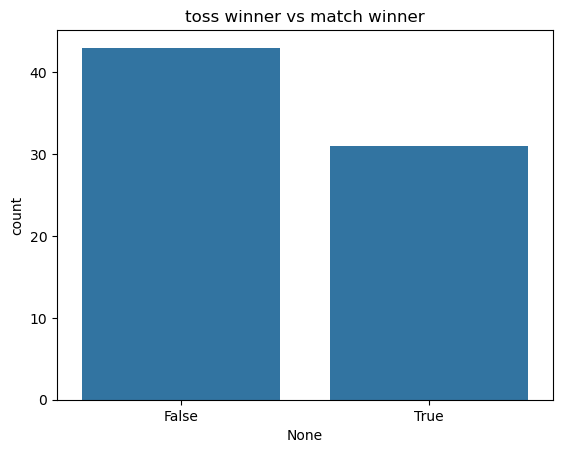

In [29]:
sns.countplot(x=(pr['toss_winner'] == pr['winner']))
plt.title("toss winner vs match winner")
plt.show()

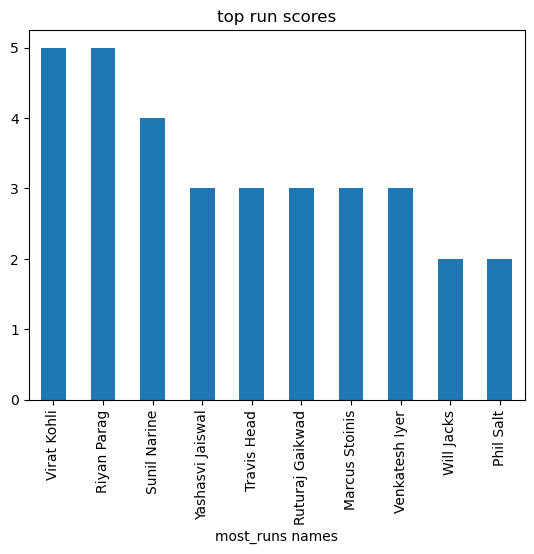

In [53]:
top_runs = pr["most_runs names"].value_counts().head(10)
top_runs.plot(kind = 'bar')
plt.title("top run scores")
plt.show()

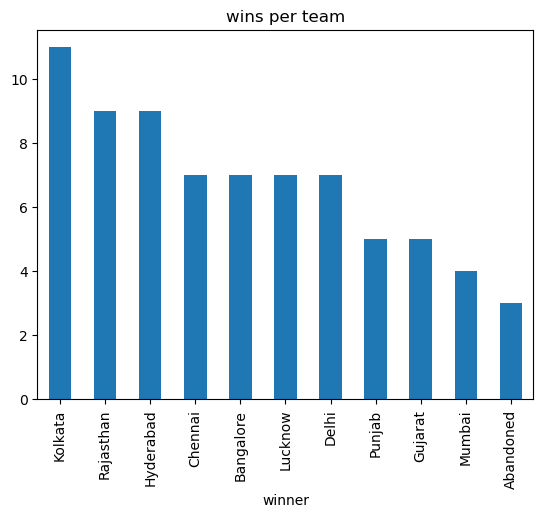

In [63]:
pr['winner'].value_counts().plot(kind= 'bar')
plt.title("wins per team")
plt.xticks(rotation = 90)
plt.show()

## ML

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

pr['team1'] = le.fit_transform(pr['team1'])
pr['team2'] = le.fit_transform(pr['team2'])
pr['toss_winner'] = le.fit_transform(pr['toss_winner'])
pr['winner'] = le.fit_transform(pr['winner'])


In [67]:
X = pr[['team1', 'team2', 'toss_winner']]
y = pr['winner']


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [74]:
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", round(accuracy*100, 2), "%")

Model Accuracy: 6.67 %


In [75]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 2 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.33      0.50      0.40         2
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1

    accuracy                           0.07        15
   macro avg       0.03      0.05      0.04        15
weighted avg       0.04      0.07      0.05        15



C:\Users\oleti\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\oleti\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\oleti\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\oleti\miniconda3\Lib\sit

In [77]:
import joblib
joblib.dump(model, "ipl_model.pkl")

['ipl_model.pkl']

In [79]:
pr.to_csv("final_cleaned_data.csv", index=False)